In [2]:
import ipywidgets as widgets
from ipywidgets import HBox,VBox
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

In [17]:
freq_slider = widgets.FloatSlider( 
    value=2., min=1., max=10.0, step=0.1, description='Frequency:', readout_format='.1f', ) 
freq_slider

FloatSlider(value=2.0, description='Frequency:', max=10.0, min=1.0, readout_format='.1f')

In [7]:
range_slider = widgets.FloatRangeSlider( 
    value=[-1., +1.], min=-5., max=+5., step=0.1, description='xlimit:', readout_format='.1f', ) 
range_slider

FloatRangeSlider(value=(-1.0, 1.0), description='xlimit:', max=5.0, min=-5.0, readout_format='.1f')

In [8]:
grid_button = widgets.ToggleButton( value=False, description='Grid', icon='check' ) 
grid_button

ToggleButton(value=False, description='Grid', icon='check')

In [24]:
color_buttons = widgets.ToggleButtons( options=['blue', 'red', 'green'], description='Color:', ) 
color_buttons

ToggleButtons(description='Color:', options=('blue', 'red', 'green'), value='blue')

In [10]:
title_textbox = widgets.Text( value='Hello World', description='Title:', ) 
title_textbox

Text(value='Hello World', description='Title:')

In [11]:
color_picker = widgets.ColorPicker( concise=True, description='Background color:', value='#efefef', ) 
color_picker

ColorPicker(value='#efefef', concise=True, description='Background color:')

In [25]:
button = widgets.Button( description='Plot', )

In [29]:
def plot2(b=None): 
        xlim = range_slider.value 
        freq = freq_slider.value 
        grid = grid_button.value 
        color = color_buttons.value 
        title = title_textbox.value 
        bgcolor = color_picker.value 
        t = np.linspace(xlim[0], xlim[1], 1000) 
        f, ax = plt.subplots(1, 1, figsize=(8, 6)) 
        ax.plot(t, np.sin(2 * np.pi * freq * t), color=color) 
        ax.set_facecolor(bgcolor)
        ax.grid(grid) 
@button.on_click 
def plot_on_click(b): 
        plot2()

Button(description='Plot', style=ButtonStyle())

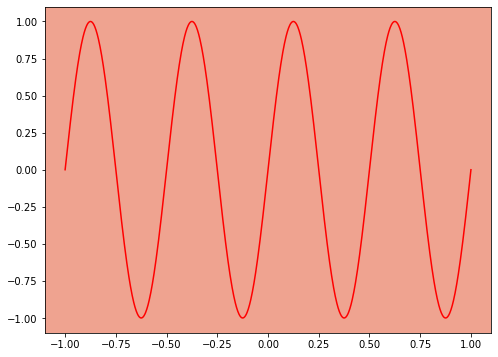

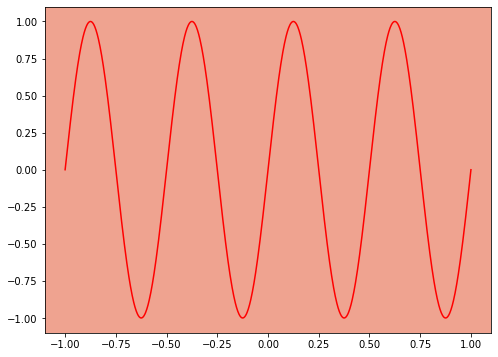

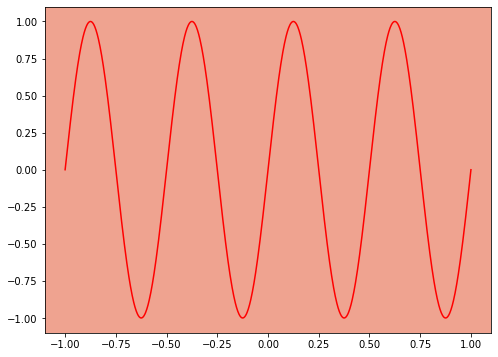

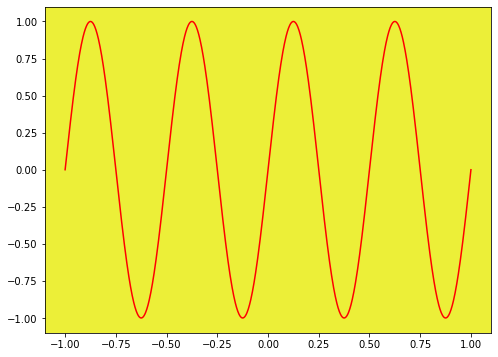

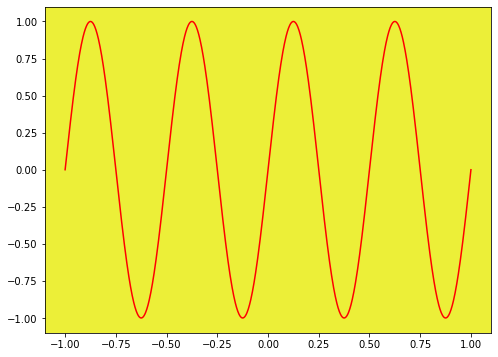

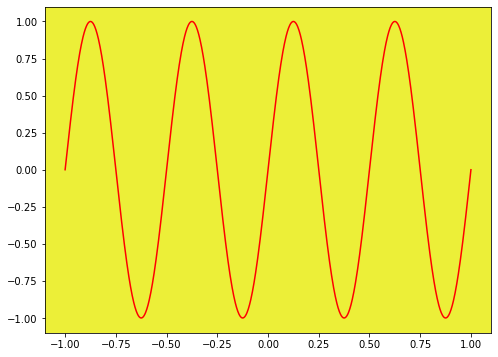

In [30]:
button

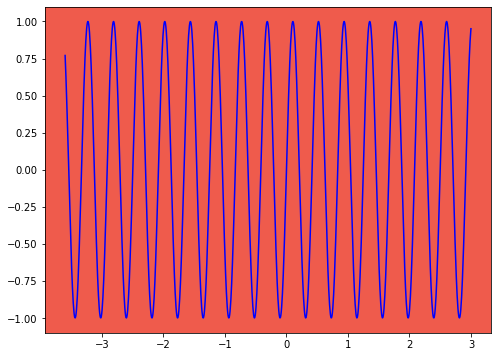

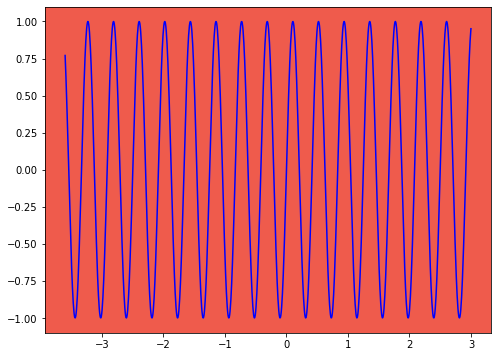

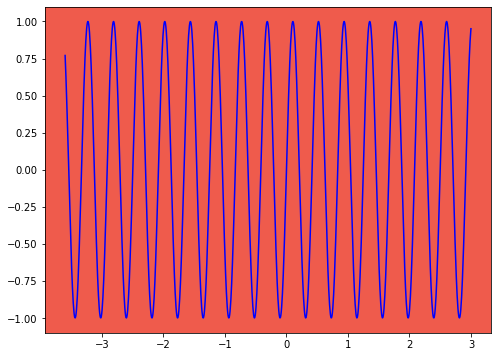

In [33]:
tab1 = VBox(children=[freq_slider, range_slider, ]) 
tab2 = VBox(children=[color_buttons, HBox(children=[title_textbox, color_picker, grid_button]), ]) 
tab = widgets.Tab(children=[tab1, tab2]) 
tab.set_title(0, 'plot') 
tab.set_title(1, 'styling') 
VBox(children=[tab, button])

In [36]:
import pandas as pd
data = pd.read_csv('Volcanoes_USA_xcqrw.txt')

In [37]:
data

,VOLCANX020,NUMBER,NAME,LOCATION,STATUS,ELEV,TYPE,TIMEFRAME,LAT,LON
0,509.0,1201-01=,Baker,US-Washington,Historical,3285.0,Stratovolcanoes,D3,48.776798,-121.810997
1,511.0,1201-02-,Glacier Peak,US-Washington,Tephrochronology,3213.0,Stratovolcano,D4,48.111801,-121.111000
2,513.0,1201-03-,Rainier,US-Washington,Dendrochronology,4392.0,Stratovolcano,D3,46.869801,-121.751000
3,515.0,1201-05-,St. Helens,US-Washington,Historical,2549.0,Stratovolcano,D1,46.199799,-122.181000
4,516.0,1201-04-,Adams,US-Washington,Tephrochronology,3742.0,Stratovolcano,D6,46.205799,-121.490997
...,...,...,...,...,...,...,...,...,...,...
57,580.0,1210-03-,Valles Caldera,US-New Mexico,Pleistocene-Fumarolic,3430.0,Caldera,Q,35.869999,-106.570999
58,581.0,1209-02-,Sunset Crater,US-Arizona,Dendrochronology,2447.0,Cinder cone,D6,35.369999,-111.501000
59,584.0,1203-20-,Amboy,US-California,Holocene,288.0,Cinder cone,U,34.549999,-115.780998
60,586.0,1210-02-,Zuni-Bandera,US-New Mexico,Anthropology,2550.0,Volcanic field,D7,34.799999,-108.001000


In [38]:
pip install folium

     |████████████████████████████████| 92kB 3.9MB/s eta 0:00:011
Note: you may need to restart the kernel to use updated packages.


In [39]:
import folium

In [41]:
lon = list(data.LON)
lat = list(data.LAT)
elev = list(data.ELEV)

In [43]:
def color_producer(elevation): 
    if(elevation<1000): 
        return("green") 
    elif(1000<=elevation<3000): 
        return("orange") 
    else: 
        return("red") 
# Using folium 
map=folium.Map(location=[32.58,-99.09],zoom_start=6,tiles="Mapbox Bright") 
fgv=folium.FeatureGroup(name="Volcanoes") 
for lt, ln, el in zip(lat, lon, elev): 
    fgv.add_child(folium.Marker(location=[lt, ln],popup=str(el)+" m",icon=folium.Icon(color=color_producer(el)))) 


In [47]:
fgp=folium.FeatureGroup(name="Population") 
fgp.add_child(folium.GeoJson(data=open('world_jcm06.json','r',encoding='utf-8-sig').read(), 
                             style_function=lambda x:{'fillColor':'green' 
                                                      if x['properties']['POP2005']>10000000 
                                                      else 'orange' 
                                                      if 10000000<= x['properties']['POP2005']<20000000 
                                                      else 'red'})) 
map.add_child(fgv) 
map.add_child(fgp) 
map.add_child(folium.LayerControl())
map.save('Live Class.html')